# Generate Plots for Classified Data

## Imports

In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
sns.set_theme()

## Plotting Functions

In [104]:
def plot(data: pd.DataFrame, title: str | None):
    fig = plt.figure()
    sns.lineplot(data=data, x="date", y="num_nontoxic", label="Nontoxic")
    sns.lineplot(data=data, x="date", y="num_toxic", label="Toxic")
    fig.suptitle(title)
    fig.axes[0].set_xlabel("Date")
    fig.axes[0].set_ylabel("Count")

def raw_plot(path: str, title: str | None = None):
    data = pd.read_csv(path)
    data["date"] = pd.to_datetime(data["date"])
    plot(data, title)

def smooth_plot(path: str, frac: float = 0.01, title: str | None = None):
    data = pd.read_csv(path)
    data["date"] = pd.to_datetime(data["date"])
    data["num_nontoxic"] = sm.nonparametric.lowess(data["num_nontoxic"], data["date"], frac=frac)[:,1][::-1]
    data["num_toxic"] = sm.nonparametric.lowess(data["num_toxic"], data["date"], frac=frac)[:,1][::-1]
    plot(data, title)

## Timeseries Plots

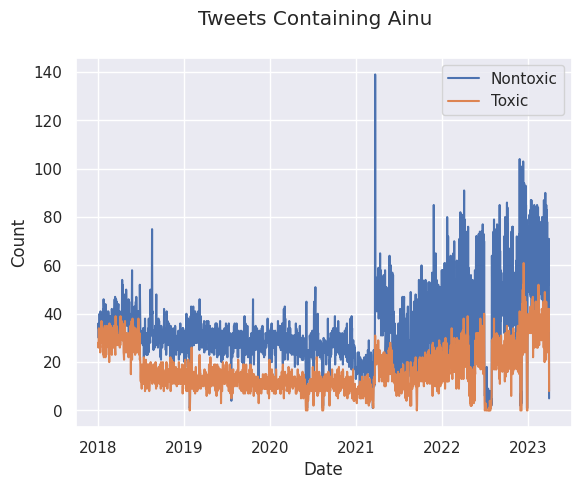

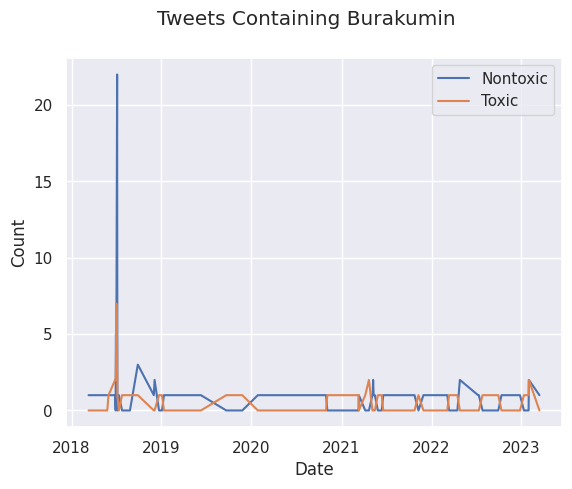

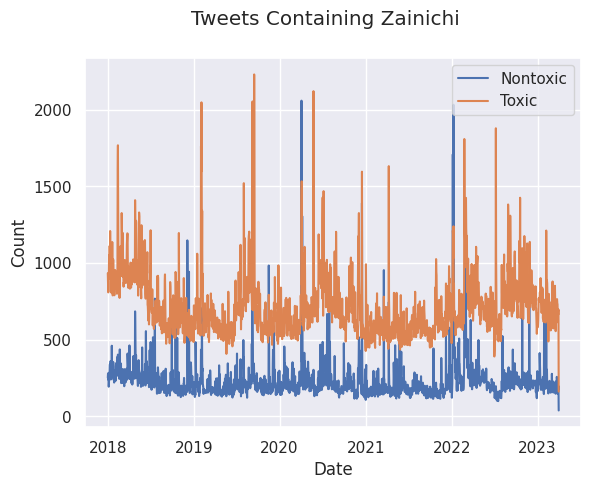

In [105]:
raw_plot("./data/twitter_ainu_since_2018_by_date.csv", title="Tweets Containing Ainu")
raw_plot("./data/twitter_burakumin_since_2018_by_date.csv", title="Tweets Containing Burakumin")
raw_plot("./data/twitter_zainichi_since_2018_by_date.csv", title="Tweets Containing Zainichi")

## Smoothed Timeseries Plots

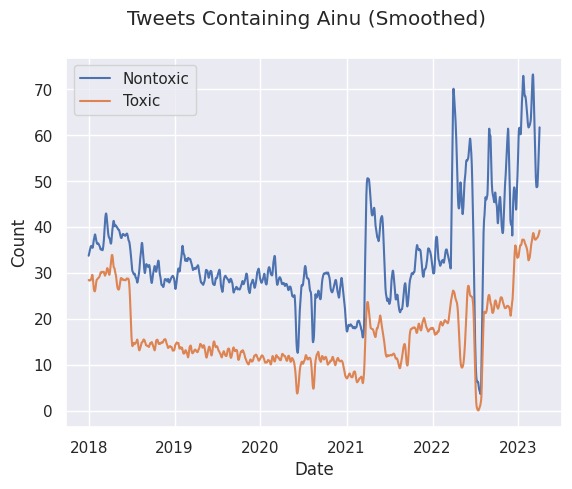

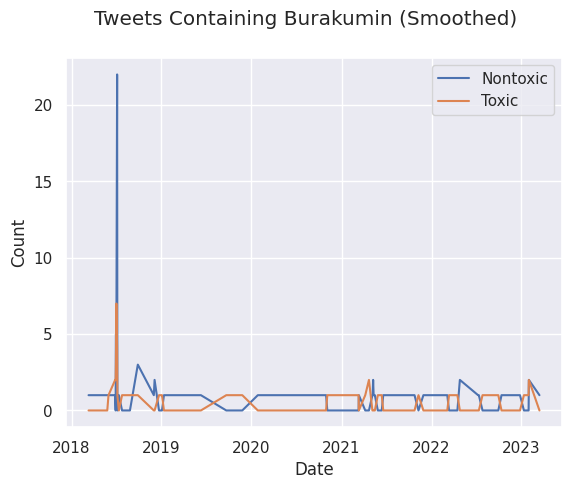

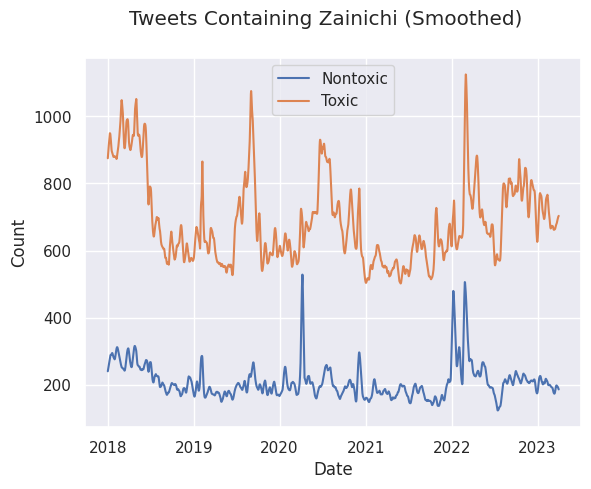

In [106]:
smooth_plot("./data/twitter_ainu_since_2018_by_date.csv", title="Tweets Containing Ainu (Smoothed)")
smooth_plot("./data/twitter_burakumin_since_2018_by_date.csv", title="Tweets Containing Burakumin (Smoothed)")
smooth_plot("./data/twitter_zainichi_since_2018_by_date.csv", title="Tweets Containing Zainichi (Smoothed)")